In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
production = pd.read_excel('Electric_and_Gas.xls', skiprows=10)

production.sample(10)   # случайные 10 значений

,observation_date,IPG2211A2N
655,1993-08-01,82.2906
436,1975-05-01,46.1066
240,1959-01-01,20.0209
647,1992-12-01,84.7818
841,2009-02-01,104.6585
374,1970-03-01,41.6215
148,1951-05-01,10.0492
84,1946-01-01,5.9417
721,1999-02-01,91.4671
115,1948-08-01,7.4659


In [3]:
# переименовывание столбца
production.rename(columns={'IPG2211A2N':'INDEX', 'observation_date':'DATE'}, inplace = True)

In [4]:
production.head()

,DATE,INDEX
0,1939-01-01,3.3842
1,1939-02-01,3.4100
2,1939-03-01,3.4875
3,1939-04-01,3.5133
4,1939-05-01,3.5133


In [5]:
production.describe()

,INDEX
count,983.000000
mean,55.314841
std,35.644091
min,3.384200
25%,19.762550
50%,55.515600
75%,88.283750
max,128.907100


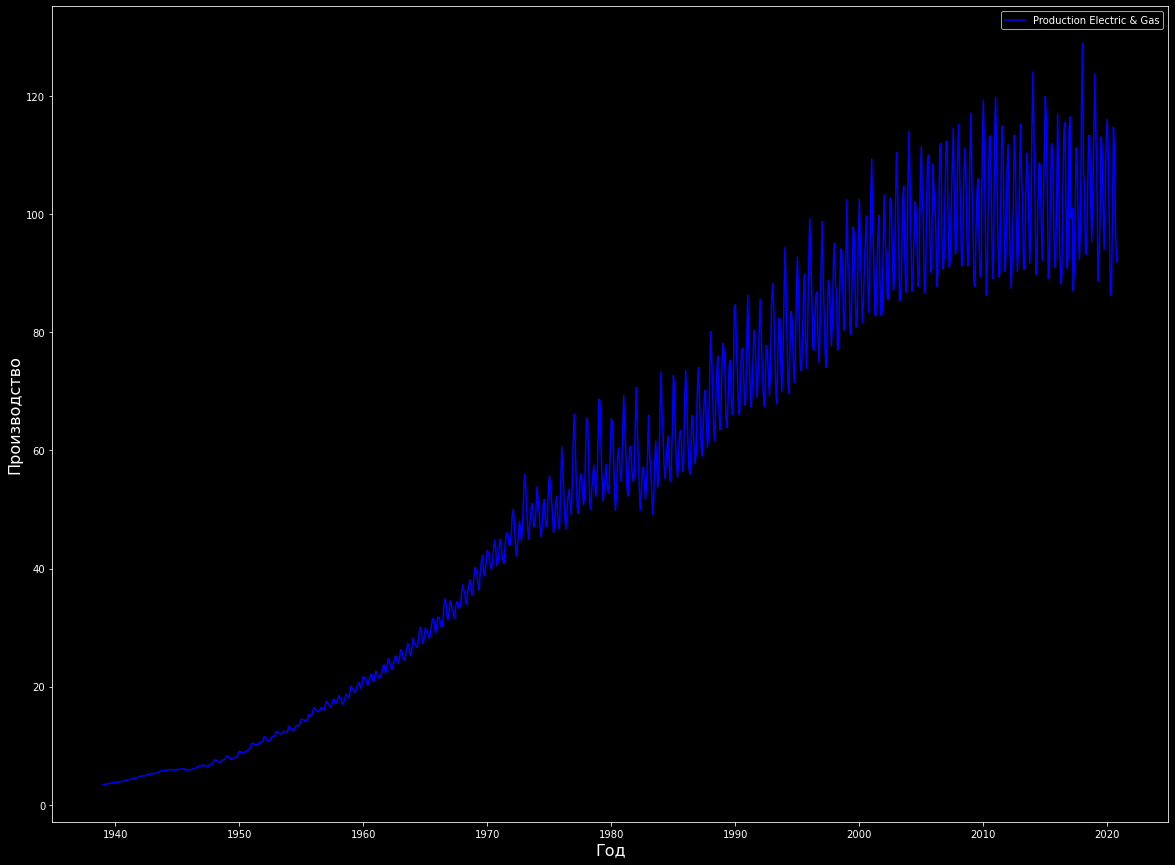

In [6]:
# рост производства по годам
x = production.DATE
y = production.INDEX
plt.figure(figsize=(20, 15))
plt.plot(x, y, label='Production Electric & Gas', color='blue')
plt.xlabel('Гoд', fontsize=16)
plt.ylabel('Производство', fontsize=16)
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D9A48043A0>]],
      dtype=object)

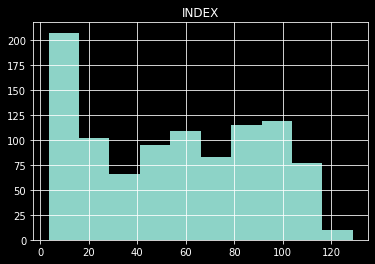

In [7]:
# хистограмма производства
production.hist('INDEX')

In [8]:
production['YEAR'] = production['DATE'].dt.year
production['MONTH'] = production['DATE'].dt.month

In [9]:
production.head()

,DATE,INDEX,YEAR,MONTH
0,1939-01-01,3.3842,1939,1
1,1939-02-01,3.4100,1939,2
2,1939-03-01,3.4875,1939,3
3,1939-04-01,3.5133,1939,4
4,1939-05-01,3.5133,1939,5


In [10]:
# среднее производство по годам
production.groupby(['YEAR'])['INDEX'].mean()

YEAR
1939      3.582217
1940      3.950358
1941      4.456242
1942      5.005225
1943      5.530525
           ...    
2016    102.296433
2017    101.516308
2018    105.929333
2019    104.841158
2020    100.226800
Name: INDEX, Length: 82, dtype: float64

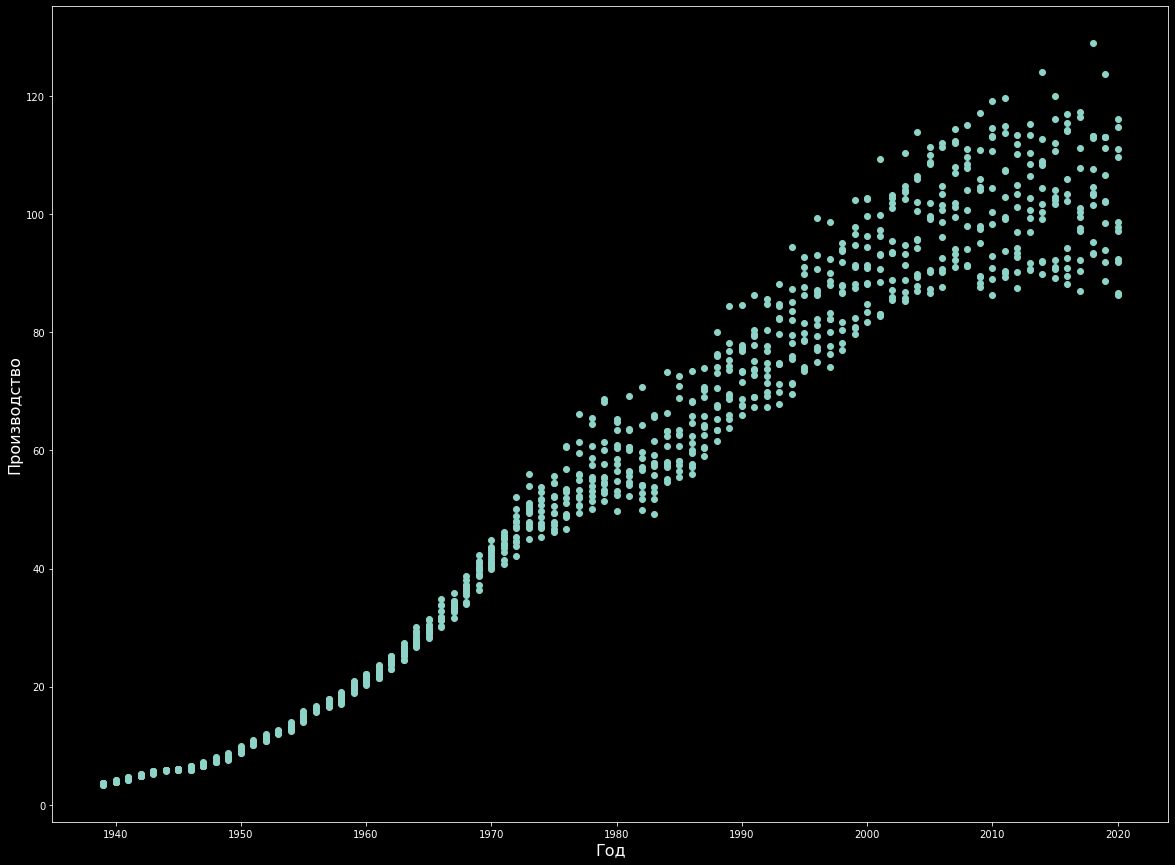

In [12]:
plt.figure(figsize=(20, 15))
plt.scatter(production['YEAR'], production['INDEX']) 
plt.xlabel('Гoд', fontsize=16)
plt.ylabel('Производство', fontsize=16)
plt.show()

In [11]:
# среднее производство по месяцам за все годы
production.groupby(['MONTH'])['INDEX'].mean()

MONTH
1     62.547762
2     58.549882
3     55.103087
4     50.090729
5     49.764267
6     53.986711
7     58.323738
8     58.803744
9     54.318315
10    50.889298
11    52.583455
12    58.860347
Name: INDEX, dtype: float64

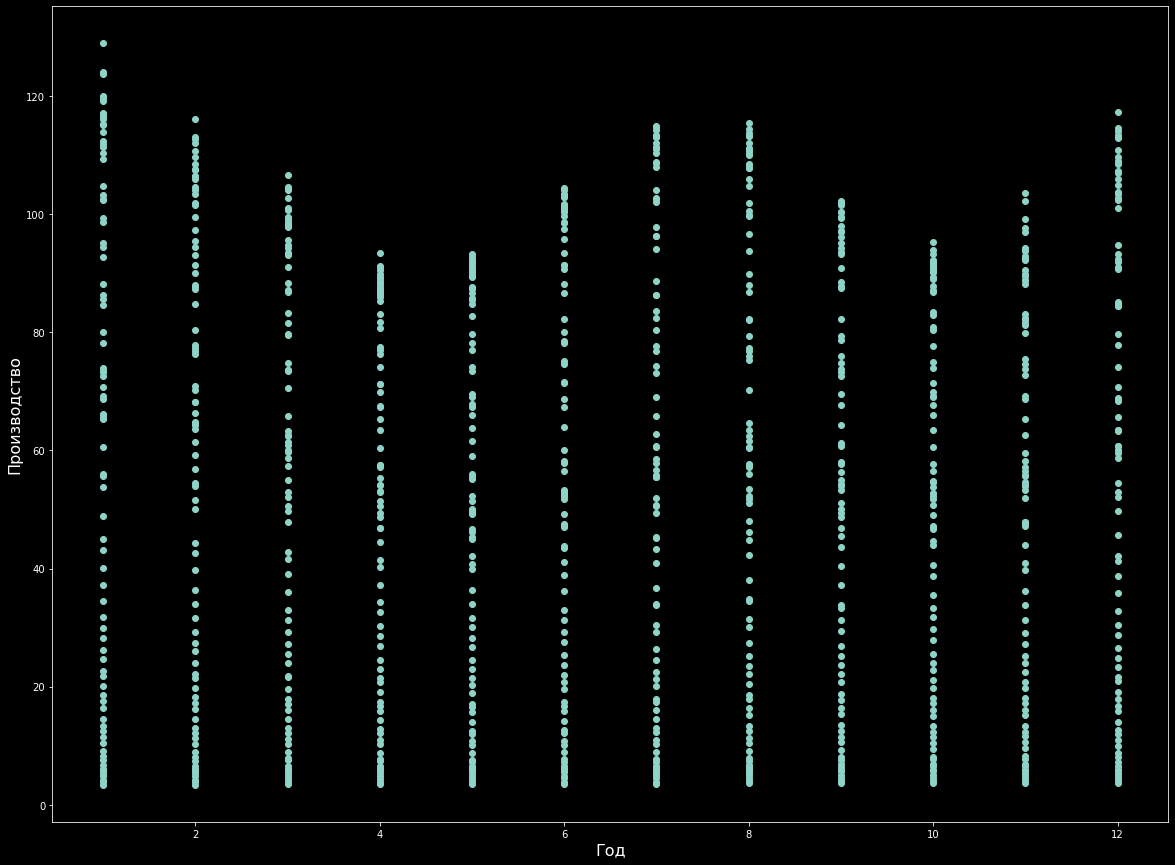

In [12]:
# месячное производство
plt.figure(figsize=(20, 15))
plt.scatter(production['MONTH'], production['INDEX']) 
plt.xlabel('Гoд', fontsize=16)
plt.ylabel('Производство', fontsize=16)
plt.show()

In [13]:
# min, max, mean производство
production_min = production.INDEX.min()
production_max = production.INDEX.max()
production_mean = production.INDEX.mean()

print(f'Минимальное производстводство: {production_min}')
print(f'Максимальное производстводство: {production_max}')
print(f'Среднее производстводство: {production_mean}')

Минимальное производстводство: 3.3842
Максимальное производстводство: 128.9071
Среднее производстводство: 55.314841302136315


In [14]:
# даты минимального и максимального производства
date_min = (production[(production['INDEX'] == production['INDEX'].min())]['DATE'])
date_max = (production[(production['INDEX'] == production['INDEX'].max())]['DATE'])

print(f'Дата максимального производства: {date_max}')
print('')
print(f'Дата минимального производства: {date_min}')

Дата максимального производства: 948   2018-01-01
Name: DATE, dtype: datetime64[ns]

Дата минимального производства: 0   1939-01-01
Name: DATE, dtype: datetime64[ns]


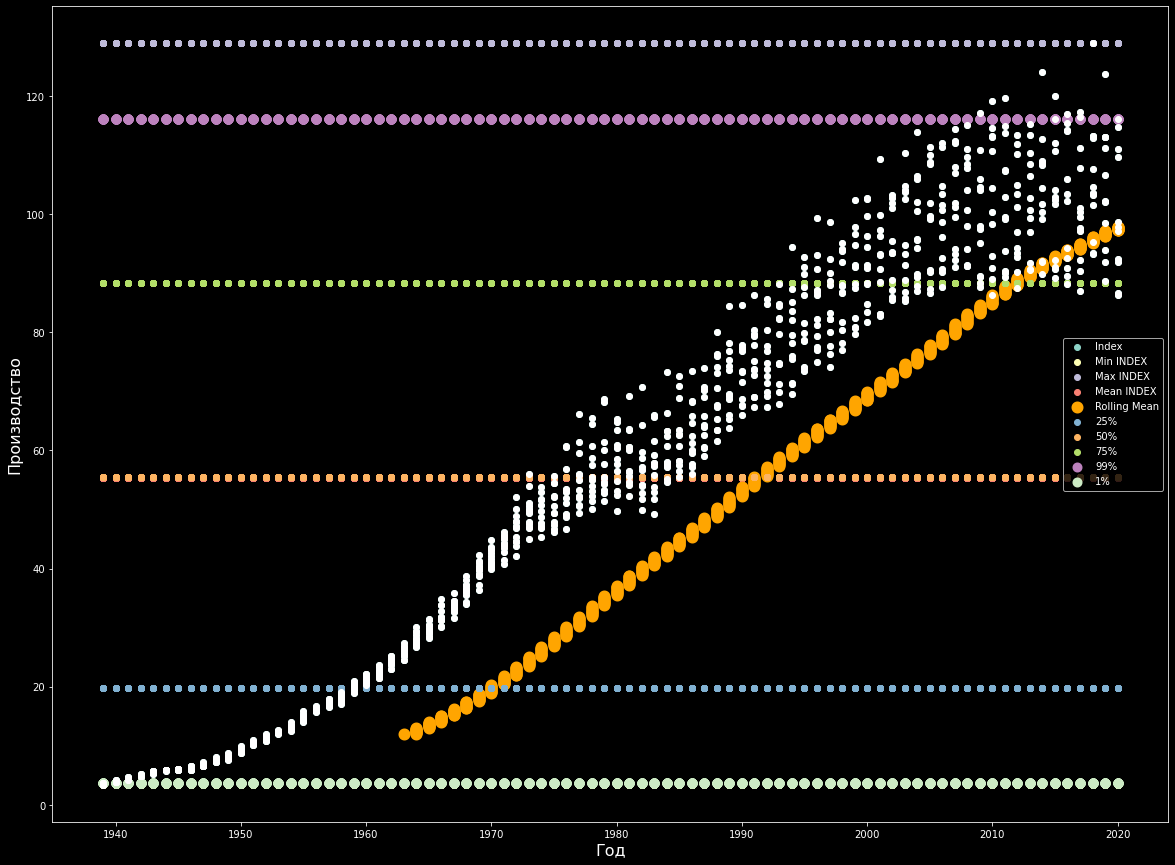

In [15]:
x = production.YEAR
y = production.INDEX

production['IMin'] = production_min
production['IMax'] = production_max
production['IMean'] = production_mean
production['RollMean500'] = production['INDEX'].rolling(300).mean()
production['Q25'] = production['INDEX'].quantile(0.25)
production['Q50'] = production['INDEX'].quantile(0.5)
production['Q75'] = production['INDEX'].quantile(0.75)
production['Q1'] = production['INDEX'].quantile(0.01)
production['Q99'] = production['INDEX'].quantile(0.99)

plt.figure(figsize=(20,15))
plt.scatter(x,y, label="Index")
plt.scatter(x, production['IMin'], label = "Min INDEX")
plt.scatter(x, production['IMax'], label = "Max INDEX")
plt.scatter(x, production['IMean'], label = "Mean INDEX")
plt.scatter(x, production['RollMean500'], label = "Rolling Mean", color='orange', linewidth=6)
plt.scatter(x, production['Q25'], label = "25%")
plt.scatter(x, production['Q50'], label = "50%")
plt.scatter(x, production['Q75'], label = "75%")
plt.scatter(x, production['Q99'], label = "99%", linewidth=4)
plt.scatter(x, production['Q1'], label = "1%", linewidth=4)

plt.scatter(production['YEAR'], production['INDEX'], color='white') 
plt.xlabel('Гoд', fontsize=16)
plt.ylabel('Производство', fontsize=16)
plt.legend()
plt.show()

In [16]:
# производство за 2019 году
start = pd.Timestamp(year=2019, month=1, day=1)
end = pd.Timestamp(year=2019, month=12, day=1)
filter = (production['DATE'] > start) & (production['DATE'] < end)
production[filter]['INDEX'].describe()

count     10.000000
mean     102.125540
std        8.859487
min       88.663100
25%       95.077550
50%      102.104350
75%      110.117100
max      113.079100
Name: INDEX, dtype: float64

In [17]:
# производство на дату
production[(production.MONTH == 6) & (production.YEAR == 2015)]

,DATE,INDEX,YEAR,MONTH,IMin,IMax,IMean,RollMean500,Q25,Q50,Q75,Q1,Q99
917,2015-06-01,102.8863,2015,6,3.3842,128.9071,55.314841,92.348092,19.76255,55.5156,88.28375,3.741156,116.199654


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [19]:
df_production = production
for i in range(1, 21):
  production[f"lag{i}"] = production['INDEX'].shift(i)
df_production.fillna(inplace=True, method='ffill')  # заполнение пустых ячеек
df_production = df_production.drop(['RollMean500','DATE', 'YEAR', 'MONTH'], axis=1)
df_production = df_production[21:]
df_production

,INDEX,IMin,IMax,IMean,Q25,Q50,Q75,Q1,Q99,lag1,...,lag11,lag12,lag13,lag14,lag15,lag16,lag17,lag18,lag19,lag20
21,4.0558,3.3842,128.9071,55.314841,19.76255,55.5156,88.28375,3.741156,116.199654,4.0300,...,3.7458,3.7200,3.7200,3.6167,3.5650,3.5650,3.5133,3.5133,3.4875,3.4100
22,4.1592,3.3842,128.9071,55.314841,19.76255,55.5156,88.28375,3.741156,116.199654,4.0558,...,3.7458,3.7458,3.7200,3.7200,3.6167,3.5650,3.5650,3.5133,3.5133,3.4875
23,4.1592,3.3842,128.9071,55.314841,19.76255,55.5156,88.28375,3.741156,116.199654,4.1592,...,3.7717,3.7458,3.7458,3.7200,3.7200,3.6167,3.5650,3.5650,3.5133,3.5133
24,4.1850,3.3842,128.9071,55.314841,19.76255,55.5156,88.28375,3.741156,116.199654,4.1592,...,3.8233,3.7717,3.7458,3.7458,3.7200,3.7200,3.6167,3.5650,3.5650,3.5133
25,4.2367,3.3842,128.9071,55.314841,19.76255,55.5156,88.28375,3.741156,116.199654,4.1850,...,3.8492,3.8233,3.7717,3.7458,3.7458,3.7200,3.7200,3.6167,3.5650,3.5650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,114.7288,3.3842,128.9071,55.314841,19.76255,55.5156,88.28375,3.741156,116.199654,98.7536,...,111.2697,113.0791,98.4548,91.9852,88.6631,106.6593,112.9837,123.7687,112.9498,103.5750
979,111.0086,3.3842,128.9071,55.314841,19.76255,55.5156,88.28375,3.741156,116.199654,114.7288,...,102.0185,111.2697,113.0791,98.4548,91.9852,88.6631,106.6593,112.9837,123.7687,112.9498
980,97.0948,3.3842,128.9071,55.314841,19.76255,55.5156,88.28375,3.741156,116.199654,111.0086,...,93.9518,102.0185,111.2697,113.0791,98.4548,91.9852,88.6631,106.6593,112.9837,123.7687
981,91.9495,3.3842,128.9071,55.314841,19.76255,55.5156,88.28375,3.741156,116.199654,97.0948,...,102.1902,93.9518,102.0185,111.2697,113.0791,98.4548,91.9852,88.6631,106.6593,112.9837


In [27]:
new_production = df_production[['INDEX', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7', 'lag8', 'lag9', 'lag10']]
new_production

,INDEX,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10
21,4.0558,4.0300,3.9783,3.9267,3.9267,3.8750,3.8492,3.8492,3.8233,3.7717,3.7458
22,4.1592,4.0558,4.0300,3.9783,3.9267,3.9267,3.8750,3.8492,3.8492,3.8233,3.7717
23,4.1592,4.1592,4.0558,4.0300,3.9783,3.9267,3.9267,3.8750,3.8492,3.8492,3.8233
24,4.1850,4.1592,4.1592,4.0558,4.0300,3.9783,3.9267,3.9267,3.8750,3.8492,3.8492
25,4.2367,4.1850,4.1592,4.1592,4.0558,4.0300,3.9783,3.9267,3.9267,3.8750,3.8492
...,...,...,...,...,...,...,...,...,...,...,...
978,114.7288,98.7536,86.7248,86.2705,97.8951,109.6578,116.0371,113.0698,102.1902,93.9518,102.0185
979,111.0086,114.7288,98.7536,86.7248,86.2705,97.8951,109.6578,116.0371,113.0698,102.1902,93.9518
980,97.0948,111.0086,114.7288,98.7536,86.7248,86.2705,97.8951,109.6578,116.0371,113.0698,102.1902
981,91.9495,97.0948,111.0086,114.7288,98.7536,86.7248,86.2705,97.8951,109.6578,116.0371,113.0698


In [28]:
X = new_production.drop(['INDEX'], axis=1)
y = new_production['INDEX']

In [29]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
linreg = LinearRegression()

In [31]:
linreg.fit(X_train, y_train)

LinearRegression()

In [32]:
linreg.score(X_train, y_train)

0.9947657191825587

In [33]:
linreg.score(X_test, y_test)

0.9933755069461333

In [34]:
linreg_prediction = linreg.predict(X_test)
linreg_prediction

array([ 37.76599538,  46.79001087,  42.62693732, 106.38115888,
        25.4507642 ,  76.71648782,  18.58587244,  59.40051268,
         7.2770896 ,  29.32217177,  98.93227084,   6.54066023,
        18.37616685, 109.8929598 ,  64.3255454 ,  31.0318963 ,
         5.64138137,  53.28861631,  90.20175747,  97.31053305,
        92.4928903 ,   9.44509092, 103.64041394, 113.73528667,
        93.58678809,   5.41939299,  21.44896991,  22.61308059,
        56.03740538,   6.58256737,  57.40016787,   8.32747492,
        78.72783835,  13.3440362 ,  54.76366945,  90.79803839,
        99.30983962,   6.38809039,  13.40809308,  76.04811841,
        60.87734236,   6.11071074,  72.10409281,  96.12328235,
        12.55870684, 103.15905786,  62.1988251 ,  11.75011009,
        47.28304856,  50.78858526,  43.63339649,  23.17666727,
        54.30844472,  30.39015044,  54.4454267 ,  92.1861995 ,
        11.05320695,  87.56472932,  30.82370178,   7.04231987,
        24.88394328,  20.53491843,  66.11819867,  14.18

In [35]:
linreg_mae = mean_absolute_error(y_test, linreg_prediction)
print('LinReg_mae: ', linreg_mae)

LinReg_mae:  1.7713852954489953
